In [5]:
#Principal component analysis on Image

In [6]:
import numpy as np
import pandas as pd
from matplotlib.image import imread
import matplotlib.pyplot as plt

(435, 450, 4)


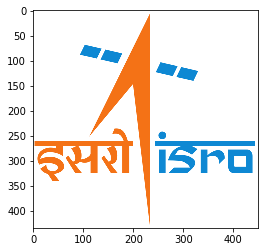

In [13]:
image = imread("C:/Users/sarve/Downloads/ML record/logo.png")
print(image_raw.shape)

plt.figure(figsize=[10,4])
plt.imshow(image)

In [17]:
image.shape

(435, 450, 4)

In [18]:
image.shape[0]*image.shape[1]*image.shape[2]

783000

In [10]:
#RGB weights

(435, 450)
1.0


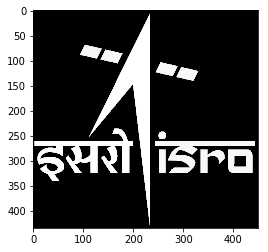

In [14]:
image_sum = image.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[10,4])
plt.imshow(image_bw, cmap=plt.cm.gray)

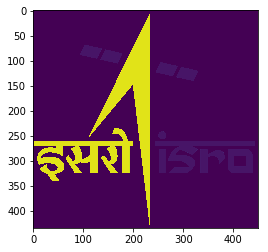

In [16]:
black_image=image[:,:,0]
plt.imshow(image[:,:,0])

In [19]:
#Using Principal component anlaysis

In [21]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Number of components explaining 95% variance: 21


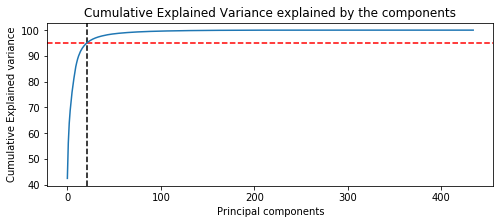

In [22]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[8,3])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

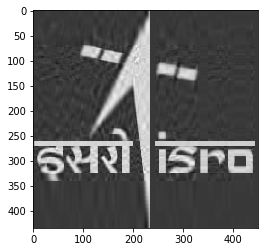

In [23]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[10,4])
plt.imshow(image_recon,cmap = plt.cm.gray)

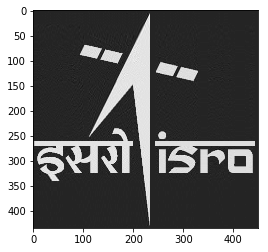

In [24]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    

k = 150
plt.figure(figsize=[10,4])
plot_at_k(100)

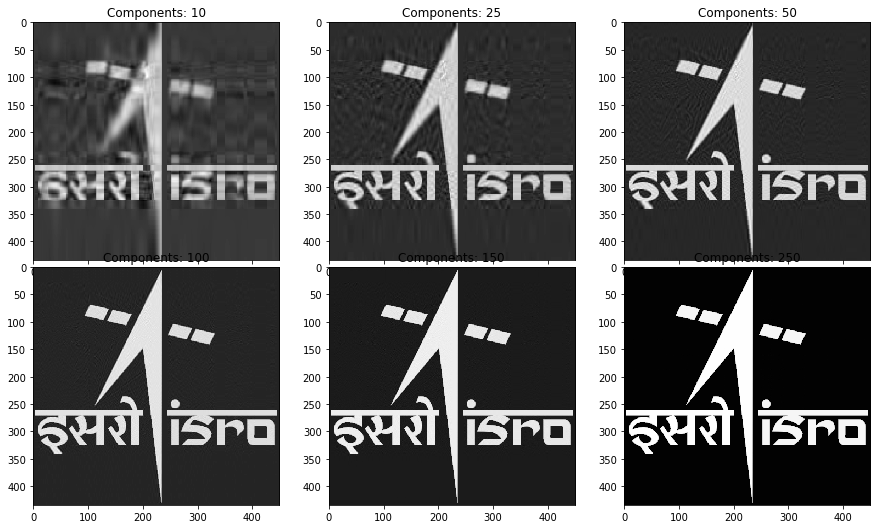

In [25]:
ks = [10, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()